<a href="https://colab.research.google.com/github/TimEbbs/COMSC175/blob/main/A2_TimothyE_200325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 2 COMSC175, Timothy Ebbs

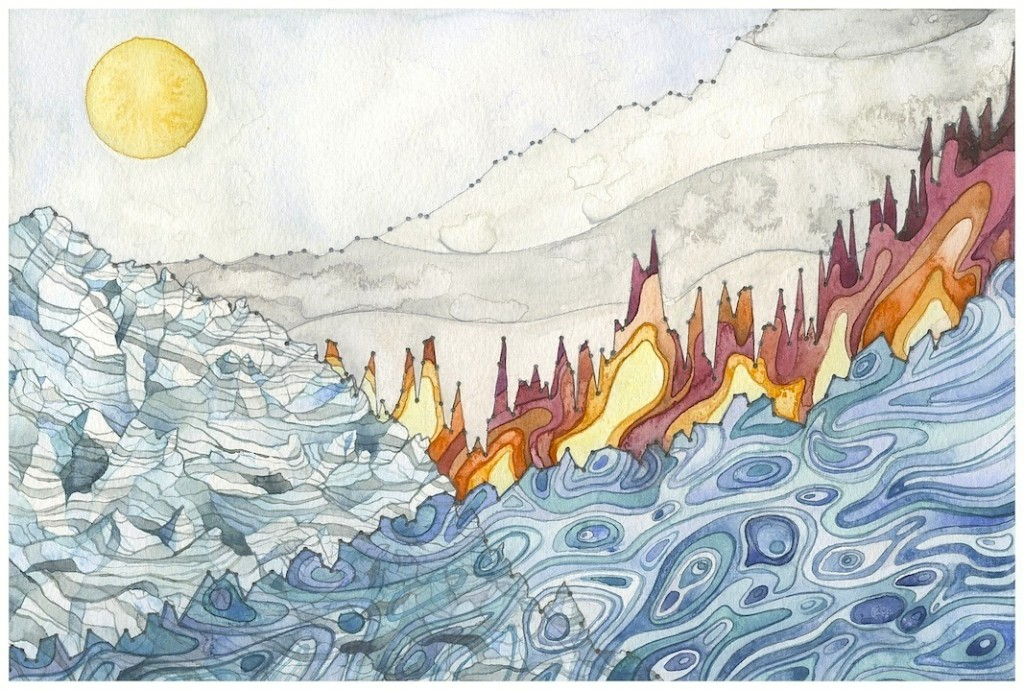

This is my submission for Assignment 2 for COMSC175. In my code I will analyze climate data from Fort McMurray from 1946-2024. All data was obtained from Environment Canada [1] and NASA [2].

The aim of the data analysis is to investigate any trends in climate change in the Fort McMurray area over the last 60 years, primarily in relation to temperature and snowfall. The trends analyzed were then compared with global data trends.

This block of code imports all the libraries used throughout the file.

It also combines all the yearly climate data .csv files into one master file to make analysis easier later on.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import rcParams
from google.colab import drive
drive.mount('/content/drive')


climate_data = '/content/drive/MyDrive/Colab Notebooks/Climate Data'

csv_files = [f for f in os.listdir(climate_data) if f.endswith('.csv')]

df_list = [pd.read_csv(os.path.join(climate_data, file)) for file in csv_files]
merged_df = pd.concat(df_list, ignore_index=True)

output_path = '/content/drive/MyDrive/merged_output.csv'
merged_df.to_csv(output_path, index=False)

print(f'Merged CSV saved to {output_path}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this code block, the climate data is accessed using pandas and then appended to lists of each individual type of data. The maximum, minimum and mean temperature values for each year are calculated and then plotted to a graph including error bars to reprsent the temperature range of each year.



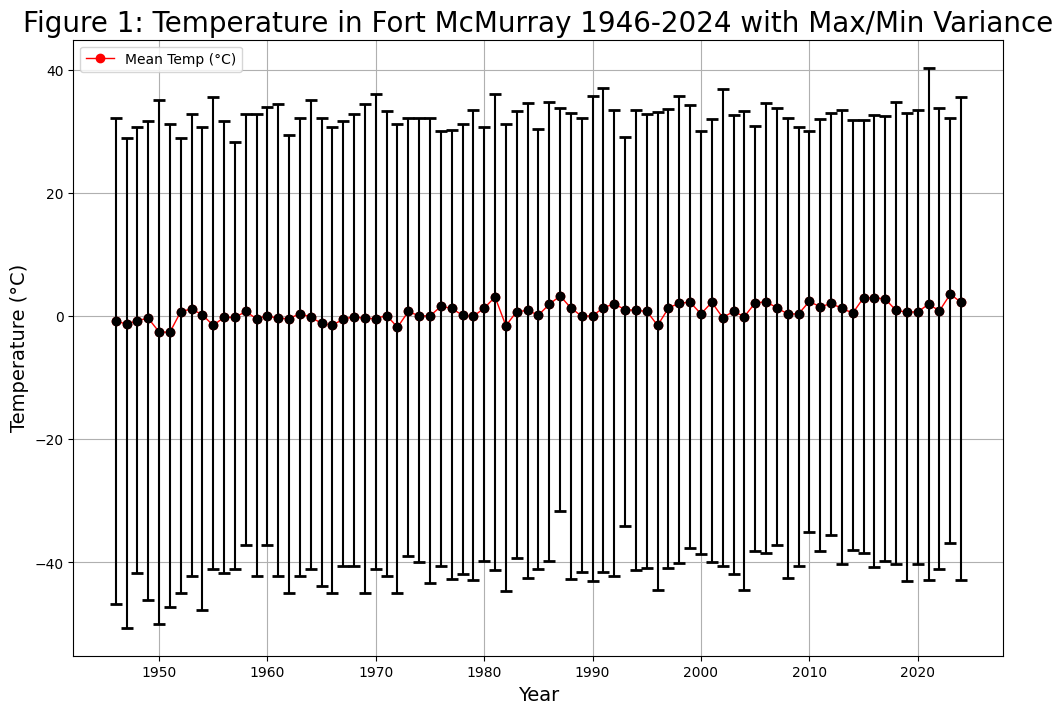

In [77]:
yearly_max_temp = []
yearly_min_temp = []
yearly_mean_temp = []
temp_lower_var = np.array([])
temp_upper_var = np.array([])
years = []

for year in range(1946,2025):
  years.append(year)
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Climate Data/en_climate_daily_AB_3062693_'+str(year)+'_P1D.csv')

  yearly_max_temp.append(data['Max Temp (°C)'].max())

  yearly_min_temp.append(data['Min Temp (°C)'].min())

  yearly_mean_temp.append(data['Mean Temp (°C)'].mean())

for value in range(0,len(yearly_mean_temp)):
  temp_lower_var = np.append(temp_lower_var, yearly_mean_temp[value]-yearly_min_temp[value])
  temp_upper_var = np.append(temp_upper_var, yearly_max_temp[value]-yearly_mean_temp[value])

variance = [temp_lower_var,temp_upper_var]

plt.figure(figsize=(12, 8))
plt.plot(years, yearly_mean_temp, marker='o', linestyle='-', color='r', linewidth=1, label='Mean Temp (°C)')
plt.errorbar(years,yearly_mean_temp, yerr= variance, fmt='o', color='black', ecolor='black', capsize=4, capthick=2)


# Labels and Title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.title('Figure 1: Temperature in Fort McMurray 1946-2024 with Max/Min Variance', fontsize=20)
plt.legend()

plt.grid(True)
plt.show()


From the above graph, there is a noticeable increase in temperature since 1946, though the scale of the graph makes it diffficult to see the significance of this. To investigate this further, I gathered global climate data from the NASA website to compare with the trends in Fort McMurray.

The below code, takes the raw data from the NASA website for climate change [2], and processes it into more managebale lists that can be plotted against each other.

A trendline of the yearly average in Fort McMurray was calculated and plotted on the same axis as the global climate data.

From the graph below it can clearly be seen that the yearly temperature in Fort McMurray increasing at an alarming rate, close to twice the rate of the global trend.

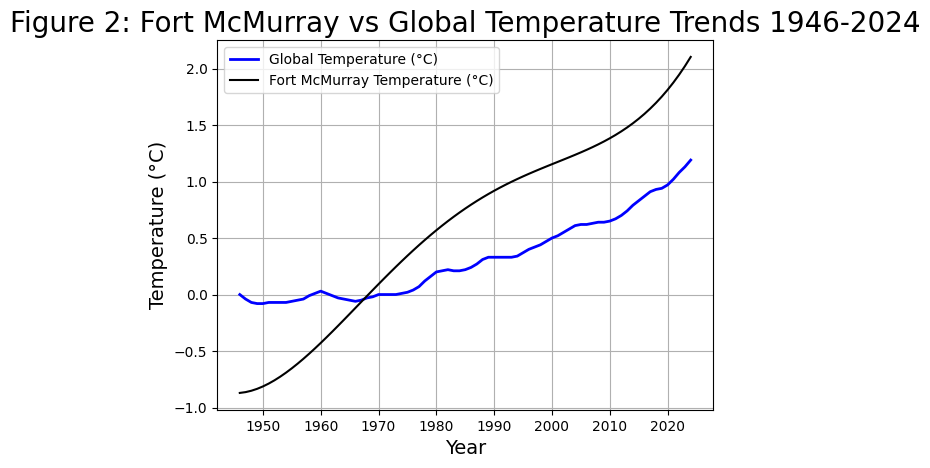

-0.7764383561643832
2.200275482093664


In [80]:
global_year = []
global_temp = []
global_trendline = []

climate_data = [
    (1946, -0.07, 0.00), (1947, -0.03, -0.04), (1948, -0.11, -0.07),
    (1949, -0.11, -0.08), (1950, -0.17, -0.08), (1951, -0.07, -0.07),
    (1952, 0.01, -0.07), (1953, 0.08, -0.07), (1954, -0.13, -0.07),
    (1955, -0.14, -0.06), (1956, -0.19, -0.05), (1957, 0.05, -0.04),
    (1958, 0.06, -0.01), (1959, 0.03, 0.01), (1960, -0.03, 0.03),
    (1961, 0.06, 0.01), (1962, 0.03, -0.01), (1963, 0.05, -0.03),
    (1964, -0.20, -0.04), (1965, -0.11, -0.05), (1966, -0.06, -0.06),
    (1967, -0.02, -0.05), (1968, -0.08, -0.03), (1969, 0.05, -0.02),
    (1970, 0.03, -0.00), (1971, -0.08, 0.00), (1972, 0.01, 0.00),
    (1973, 0.16, -0.00), (1974, -0.07, 0.01), (1975, -0.01, 0.02),
    (1976,-0.10,0.04),
    (1977, 0.18, 0.07), (1978, 0.07, 0.12), (1979, 0.16, 0.16),
    (1980, 0.26, 0.20), (1981, 0.32, 0.21), (1982, 0.14, 0.22),
    (1983, 0.31, 0.21), (1984, 0.16, 0.21), (1985, 0.12, 0.22),
    (1986, 0.18, 0.24), (1987, 0.32, 0.27), (1988, 0.39, 0.31),
    (1989, 0.27, 0.33), (1990, 0.45, 0.33), (1991, 0.41, 0.33),
    (1992, 0.22, 0.33), (1993, 0.23, 0.33), (1994, 0.32, 0.34),
    (1995, 0.45, 0.37), (1996, 0.33, 0.40), (1997, 0.47, 0.42),
    (1998, 0.61, 0.44), (1999, 0.38, 0.47), (2000, 0.39, 0.50),
    (2001, 0.53, 0.52), (2002, 0.63, 0.55), (2003, 0.62, 0.58),
    (2004, 0.53, 0.61), (2005, 0.68, 0.62), (2006, 0.64, 0.62),
    (2007, 0.66, 0.63), (2008, 0.54, 0.64), (2009, 0.66, 0.64),
    (2010, 0.72, 0.65), (2011, 0.61,0.67), (2012, 0.65, 0.70), (2013, 0.68, 0.74),
    (2014, 0.75, 0.79), (2015, 0.90, 0.83), (2016, 1.01, 0.87),
    (2017, 0.92, 0.91), (2018, 0.85, 0.93), (2019, 0.98, 0.94),
    (2020, 1.01, 0.97), (2021, 0.85, 1.02), (2022, 0.89, 1.08),
    (2023, 1.17, 1.13), (2024, 1.28, 1.19)]

for val in range(len(climate_data)):
  global_year.append(climate_data[val][0])
  global_temp.append(climate_data[val][1])
  global_trendline.append(climate_data[val][2])

plt.plot(global_year, global_trendline, marker='', linestyle='-', color='b', linewidth=2, label='Global Temperature (°C)')

#Temp Trendline

coeffs_temp = np.polyfit(global_year, yearly_mean_temp, 4)
poly_eq_temp = np.poly1d(coeffs_temp)
y_fit_temp = poly_eq_temp(global_year)
plt.plot(global_year, y_fit_temp, color='black', label='Fort McMurray Temperature (°C)')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.title('Figure 2: Fort McMurray vs Global Temperature Trends 1946-2024', fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

Clearly, global increasing temperature trends are not only reflected in Fort McMurray's climate, are even more pronounced. This leads to the next question of are the effects of increasing temperature seen in other areas of climate such as snowfall?

The next block of code accesses snowfall data from Fort McMurray and plots it on two seperate trendlines with seperate y-axis. The two lines show total yearly snowfall (cm) and the daily maximum (cm). These two data points are of particular interest because they give insight into how much snow Fort McMurray is receiving and also intensity of snowfall when it does snow.

It also plots a trendline of the data and calculates an R-squared variance for the dataset.

One key thing to mention about the graph, I have purposefully chosen the range of the left side y-axis, this is done mostly for visual appeal so that the two trendlines can be easily compared.

<ipython-input-79-f85711116172>:27: RankWarning: Polyfit may be poorly conditioned
  coeffs_total = np.polyfit(years, yearly_total_snow, 10)
<ipython-input-79-f85711116172>:39: RankWarning: Polyfit may be poorly conditioned
  coeffs_daily = np.polyfit(years, daily_max_snow, 10)


The R-squared value of the total snowfall trendline is 0.92


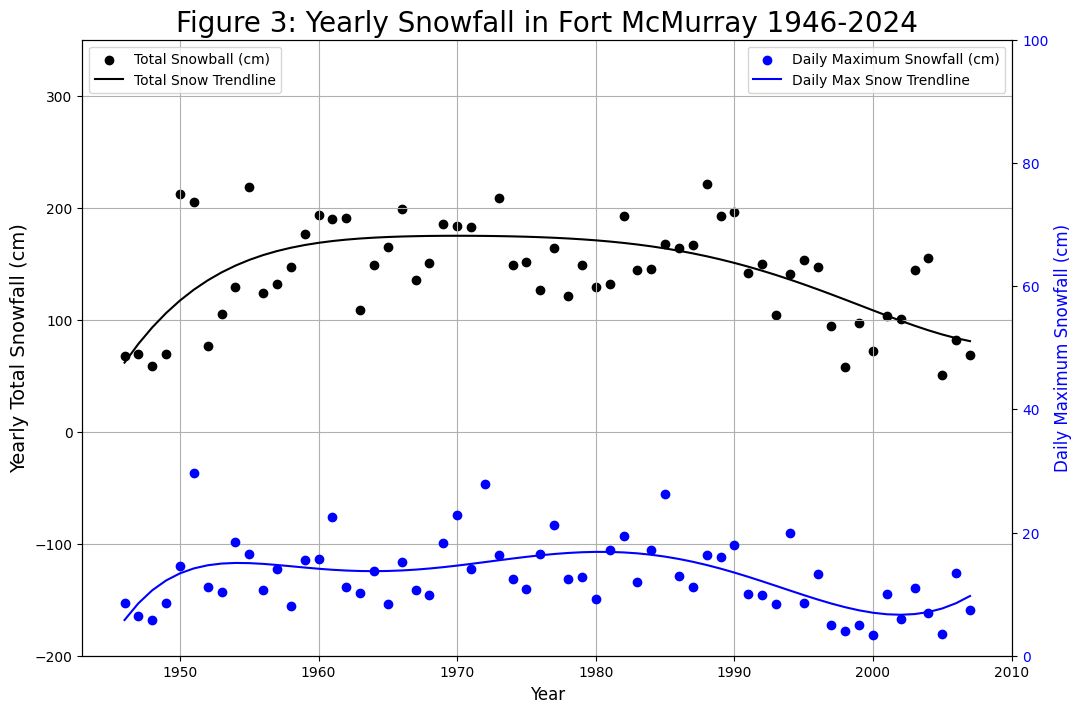

In [79]:
yearly_total_snow = []
daily_max_snow = []
yearly_mean_snow = []
years = []

for year in range(1946,2008):
  years.append(year)
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Climate Data/en_climate_daily_AB_3062693_'+str(year)+'_P1D.csv')
  yearly_total_snow.append(data['Total Snow (cm)'].sum())
  daily_max_snow.append(data['Total Snow (cm)'].max())
  yearly_mean_snow = data['Total Snow (cm)'].mean()

#Plotting Total Snow and Daily Snow

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.scatter(years, yearly_total_snow, marker='o', linestyle='-', color='k', label='Total Snowball (cm)')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Yearly Total Snowfall (cm)', fontsize=14)
ax1.tick_params(axis='y', labelcolor='k')
ax2 = ax1.twinx()
ax2.scatter(years, daily_max_snow, marker='o', linestyle='-', color='b', label='Daily Maximum Snowfall (cm)')
ax2.set_ylabel('Daily Maximum Snowfall (cm)', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='b')

#Total Snow Trendline

coeffs_total = np.polyfit(years, yearly_total_snow, 10)
poly_eq_total = np.poly1d(coeffs_total)
y_fit_total = poly_eq_total(years)
ax1.plot(years, y_fit_total, color='black', label='Total Snow Trendline')
ax1.set_ylim(-200,350)

ss_res_total = np.sum((yearly_total_snow - y_fit_total)**2)
ss_tot_total = np.sum((yearly_total_snow - np.mean(yearly_mean_snow))**2)
r_squared_total = 1 - (ss_res_total / ss_tot_total)

#Daily Snow Trendline

coeffs_daily = np.polyfit(years, daily_max_snow, 10)
poly_eq_daily = np.poly1d(coeffs_daily)
y_fit_daily = poly_eq_daily(years)
ax2.plot(years, y_fit_daily, color='blue', label='Daily Max Snow Trendline')
ax2.set_ylim(0,100)

ss_res_daily = np.sum((daily_max_snow - y_fit_daily) ** 2)
ss_tot_daily = np.sum((daily_max_snow - np.mean(daily_max_snow)) ** 2)
r_squared_daily = 1 - (ss_res_daily / ss_tot_daily)

# Calculate the R-squared value

plt.title('Figure 3: Yearly Snowfall in Fort McMurray 1946-2024', fontsize=20)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax1.grid(True)

print('The R-squared value of the total snowfall trendline is %.2f'%r_squared_total)


The graph shows a clear downward trend in snowfall since approxiamately 1975. Daily maximum snowfall follows a similar trend until the early 2000's, where it begins to slightly increase. The relationshup suggests that the snow season Fort McMurray getting shorter but more intense. If the trends were to continue, this would eventually lead to a situation where snowfall would only come in very short and extreme weather events, this does not reflect a healthy climate.

The following recursive function calculates the rate of increase or decrease in temperature for each indiviudal year in a range of the two arguments (start_year and finish_year). It compares this with all other years in the range and returns the two years over with the greatest increase and decrease in temperature occurred and by what magnitude was the change.

In [75]:
def SnowfallChangeRecursive(start_year, finish_year, year=None, greatest_decrease='', decrease_mag=float('inf'), greatest_increase='', increase_mag=float('-inf')):
    if start_year == finish_year:
        print('Make sure the start year is different from the finish year')
        return None

    if start_year < 1946 or finish_year > 2007:
        print('Make sure the start year is greater than 1946 and the finish year is less than 2007')
        return None

    if year is None:
        year = start_year

    if year == finish_year:
        return 'The greatest decrease in snowfall occurred in %s, with a change of %.2f.'%(greatest_decrease,decrease_mag),\
        'The greatest increase in snowfall occurred in %s, with a change of %.2f.'%(greatest_increase,increase_mag)
    start_snow_val = y_fit_total[year - 1946]
    finish_snow_val = y_fit_total[year - 1945]
    snowfall_change = finish_snow_val - start_snow_val

    if snowfall_change < decrease_mag:
        greatest_decrease = str(year)+'-'+str(year + 1)
        decrease_mag = snowfall_change

    if snowfall_change > increase_mag:
        greatest_increase = str(year)+'-'+str(year + 1)
        increase_mag = snowfall_change

    return SnowfallChangeRecursive(start_year, finish_year, year + 1, greatest_decrease, decrease_mag, greatest_increase, increase_mag)

result = SnowfallChangeRecursive(1946, 2007)
print(result)

('The greatest decrease in snowfall occurred in 1999-2000, with a change of -4.76.', 'The greatest increase in snowfall occurred in 1946-1947, with a change of 16.76.')


Conclusion:

The aim of this investigation was to answer three main questions.
1. Does historical weather data support the idea that winters are getting milder in Fort McMurray?
2. Do trends in Fort McMurrays climate data align with trends in global climate data oer the same time period?
3. Are there any other factors like wind chill or total precipitation that may contribute to the feeling of a "milder" winter?

It can decisively be said that since 1946, yearly average temperature in Fort McMurray has increased by 2.8°C. Yearly total snowfall has been steadily declining since 1980. Temperature and snowfall are the two largest factors that contibute to the feeling of how harsh or mild a winter may be. So it can be concluded that trends observe din climate data agree with the idea that winters are becoming milder in Fort McMurray.

The yearly mean temperature of Fort McMurray was compared with global climate data sourced form NASA and plotted together on the same axis to make a direct comparison. It was clearly seen that the temperature in Fort McMurray is increasing at an even faster rate the the global average.

In relation to other factors contributing to climate in Fort McMurray. Though wind chill does play a significant role how harsh a winter can feel, it is extremely variable especially in suburban areas. This makes it difficult to find accurate data that can be easily interpreted and analysed for trends. Snowfall (cm) was decided as a much better alternative for long term analysis. As discussed above, snowfall is becoming less each year in Fort McMurray. This has a direct effect on how mild a winter may feel due to the high albedo of snow. Less snowfall will mean that darker surfaces underneath are exposed to more sunlight, in doing so that absorb more radiation as a result of their lower albedo. This means the ground is warmer on avergae which then helps to melt more snow, speeding up the whole process. It is a positive feeback loop that leads to milder winters.

Overall, it can be concluded that the climate of Fort McMurray is becoming warmer at a rate that outpaces the global average. If these trends continue then they will have devestating effects on the environment that may be irreversible.

References:

Environment Canada. (2024, December 4). Weather information. Environment Canada. https://weather.gc.ca/

NASA. (2025, January 29). Global surface temperature. NASA. https://climate.nasa.gov/vital-signs/global-temperature/?intent=121

